In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, PowerTransformer, LabelEncoder

df = pd.read_csv("data/dataset capstone.csv")
print(df.head())




  Jenis Kelamin  Umur (bulan)  Tinggi Badan (cm)  Berat Badan (kg)  \
0     Laki-laki            19               91.6              13.3   
1     Laki-laki            20               77.7               8.5   
2     Laki-laki            10               79.0              10.3   
3     Perempuan             2               50.3               8.3   
4     Perempuan             5               56.4              10.9   

           Stunting             Wasting  
0              Tall  Risk of Overweight  
1           Stunted         Underweight  
2            Normal  Risk of Overweight  
3  Severely Stunted  Risk of Overweight  
4  Severely Stunted  Risk of Overweight  


In [2]:
#melihat statistik deskriptif data
print("Statistika Deskriptif")
print(df.describe())



Statistika Deskriptif
        Umur (bulan)  Tinggi Badan (cm)  Berat Badan (kg)
count  100000.000000      100000.000000     100000.000000
mean       11.992580          73.132657          9.259256
std         7.199671          11.360846          3.300780
min         0.000000          42.600000          1.000000
25%         6.000000          65.500000          6.900000
50%        12.000000          74.200000          9.200000
75%        18.000000          81.400000         11.700000
max        24.000000          97.600000         17.200000


In [3]:
#melihat informasi dataset
print("Informasi Data")
print(df.info())



Informasi Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis Kelamin      100000 non-null  object 
 1   Umur (bulan)       100000 non-null  int64  
 2   Tinggi Badan (cm)  100000 non-null  float64
 3   Berat Badan (kg)   100000 non-null  float64
 4   Stunting           100000 non-null  object 
 5   Wasting            100000 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.6+ MB
None


In [4]:
#melihat data duplikat
duplicate = df.duplicated().sum()
print(f"Duplikasi Data: {duplicate}")



Duplikasi Data: 7308


In [5]:
print(df.isnull().sum())



Jenis Kelamin        0
Umur (bulan)         0
Tinggi Badan (cm)    0
Berat Badan (kg)     0
Stunting             0
Wasting              0
dtype: int64


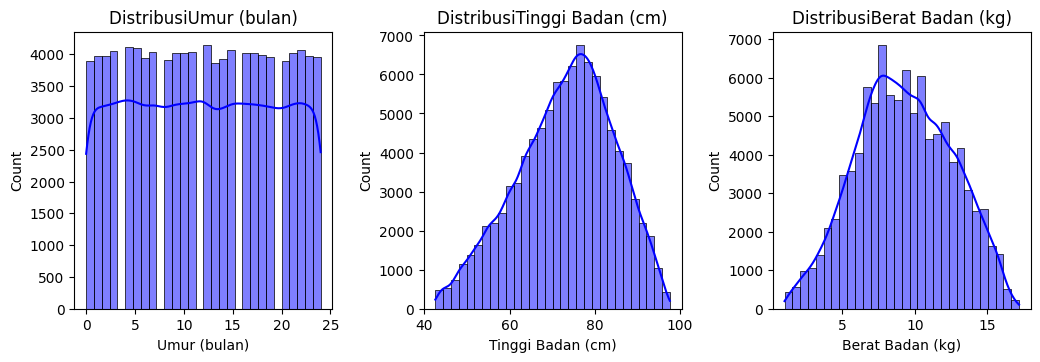

In [6]:
#melihat distribusi fitur numerik
num_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14,10))
for i, column in enumerate(num_features.columns,1):
    plt.subplot(3,4,i)
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi{column}')
plt.tight_layout()
plt.show()



C:\Users\User\AppData\Local\Temp\ipykernel_8108\777112404.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')
C:\Users\User\AppData\Local\Temp\ipykernel_8108\777112404.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')
C:\Users\User\AppData\Local\Temp\ipykernel_8108\777112404.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')


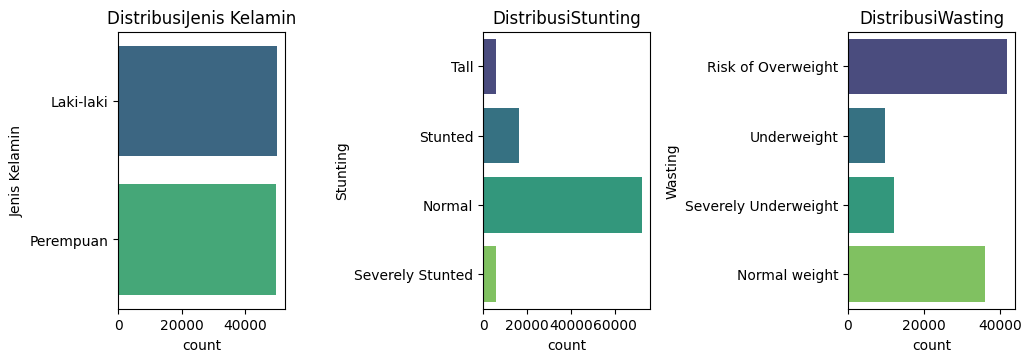

In [7]:
#melihat distribusi fitur kategorikal
cat_features = df.select_dtypes(include=[object])
plt.figure(figsize=(14,10))
for i, column in enumerate(cat_features.columns,1):
    plt.subplot(3,4,i)
    sns.countplot(y=df[column], palette='viridis')
    plt.title(f'Distribusi{column}')
plt.tight_layout()
plt.show()



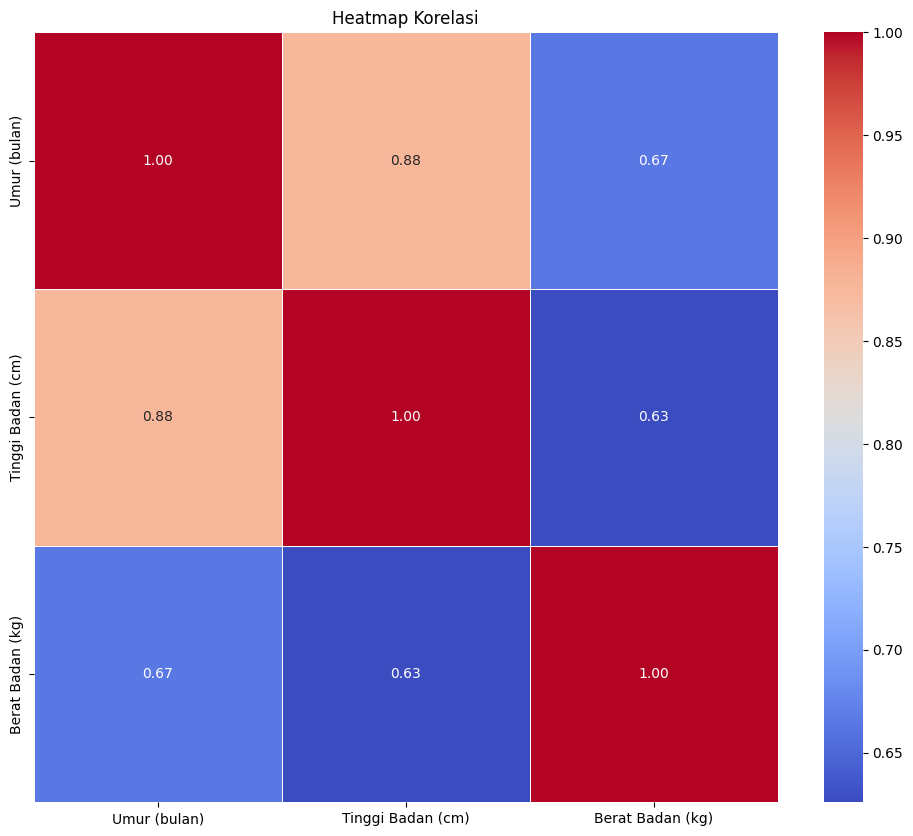

In [8]:
#melihat korelasi antar fitur
plt.figure(figsize=(12,10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

In [9]:
#menghapus data duplikat 
df = df.drop_duplicates()
duplicate = df.duplicated().sum()
print(f'Jumlah data duplikat : {duplicate}')


Jumlah data duplikat : 0


In [10]:
#Mengelompokkan kolom numerik dan kategori
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(numerical_cols)
print(categorical_cols)

['Umur (bulan)', 'Tinggi Badan (cm)', 'Berat Badan (kg)']
['Jenis Kelamin', 'Stunting', 'Wasting']


In [11]:
# Normalisasi Fitur Numerik dengan MinMaxScaler
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [12]:
# Label Encoding untuk Fitur Kategorikal
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Jenis Kelamin'] = le.fit_transform(df['Jenis Kelamin'])


In [13]:
print(df['Stunting'].value_counts())
print(df['Wasting'].value_counts())


Stunting
Normal              67055
Stunted             15039
Severely Stunted     5333
Tall                 5265
Name: count, dtype: int64
Wasting
Risk of Overweight      38846
Normal weight           33376
Severely Underweight    11301
Underweight              9169
Name: count, dtype: int64


In [14]:
# Pisahkan fitur (X) dan label (y)
X = df.drop(columns=["Stunting", 'Wasting'])  # semua kolom kecuali target
y = df["Stunting"]                 # kolom target


In [15]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Asumsikan X adalah fitur dan y adalah label (kategori stunting)
print("Distribusi sebelum SMOTE:", Counter(y))

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Resampling data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Cek hasil distribusi setelah SMOTE
print("Distribusi setelah SMOTE:", Counter(y_resampled))


Distribusi sebelum SMOTE: Counter({'Normal': 67055, 'Stunted': 15039, 'Severely Stunted': 5333, 'Tall': 5265})


c:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Distribusi setelah SMOTE: Counter({'Tall': 67055, 'Stunted': 67055, 'Normal': 67055, 'Severely Stunted': 67055})


In [16]:
df_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=["Stunting"])], axis=1)

In [17]:
print(df_resampled)

        Jenis Kelamin  Umur (bulan)  Tinggi Badan (cm)  Berat Badan (kg)  \
0                   0      0.791667           0.890909          0.759259   
1                   0      0.833333           0.638182          0.462963   
2                   0      0.416667           0.661818          0.574074   
3                   1      0.083333           0.140000          0.450617   
4                   1      0.208333           0.250909          0.611111   
...               ...           ...                ...               ...   
268215              0      0.458333           0.709531          0.697957   
268216              0      0.833333           0.924583          0.416541   
268217              1      0.500000           0.726768          0.647719   
268218              0      0.875000           0.934545          0.654652   
268219              1      0.833333           0.902736          0.666667   

                Stunting  
0                   Tall  
1                Stunted  
2     

In [18]:
import pandas as pd
df_encoded = pd.get_dummies(df_resampled, columns=['Stunting'])

In [19]:
print(df_encoded)

        Jenis Kelamin  Umur (bulan)  Tinggi Badan (cm)  Berat Badan (kg)  \
0                   0      0.791667           0.890909          0.759259   
1                   0      0.833333           0.638182          0.462963   
2                   0      0.416667           0.661818          0.574074   
3                   1      0.083333           0.140000          0.450617   
4                   1      0.208333           0.250909          0.611111   
...               ...           ...                ...               ...   
268215              0      0.458333           0.709531          0.697957   
268216              0      0.833333           0.924583          0.416541   
268217              1      0.500000           0.726768          0.647719   
268218              0      0.875000           0.934545          0.654652   
268219              1      0.833333           0.902736          0.666667   

        Stunting_Normal  Stunting_Severely Stunted  Stunting_Stunted  \
0              

In [23]:
df_encoded = df_encoded.rename(columns={
    'Stunting_Normal': 'Stunting_Normal',
    'Stunting_Stunted': 'Stunting_Pendek',
    'Stunting_Severely Stunted': 'Stunting_Sangat Pendek',
    'Stunting_Tall': 'Stunting_Tinggi'
})

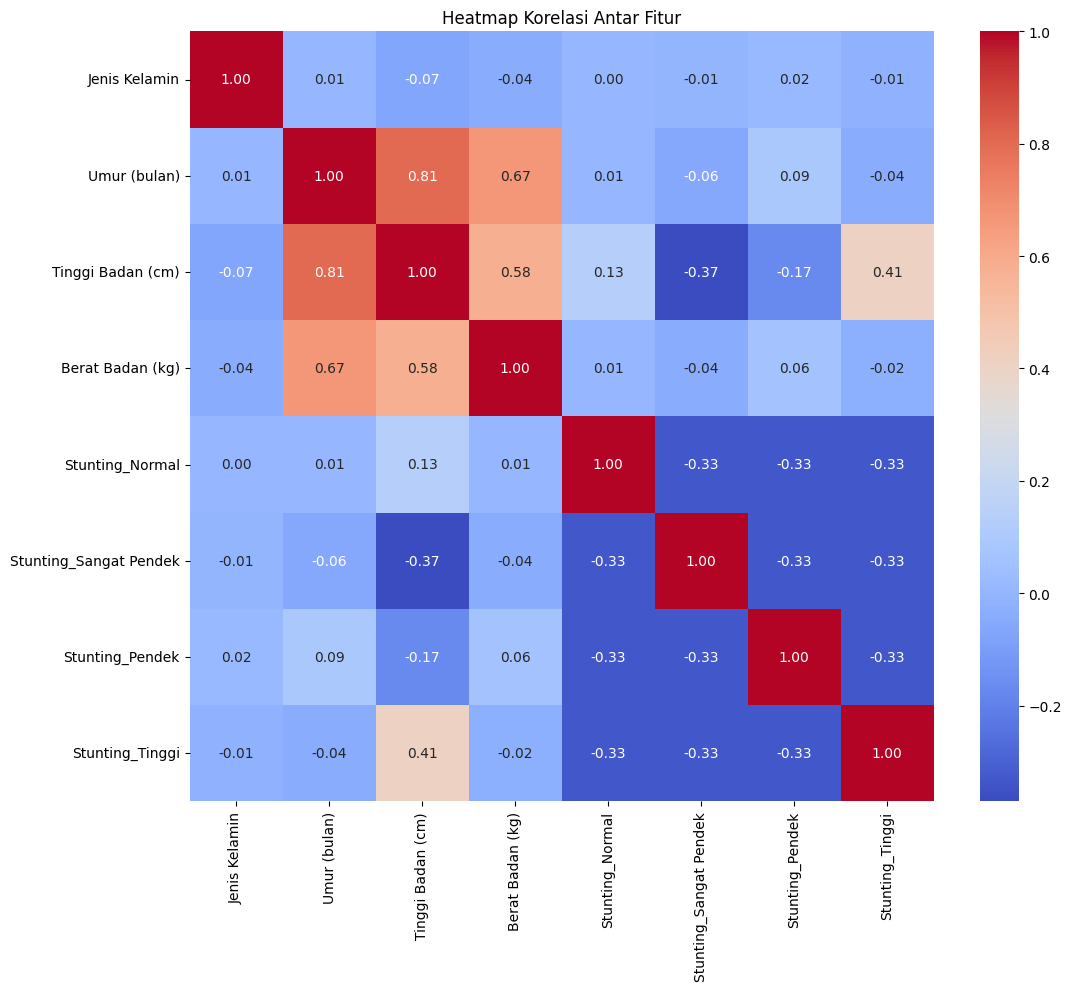

In [24]:
# Hitung korelasi antar kolom numerik (default pakai Pearson)
corr_matrix = df_encoded.corr()

# Tampilkan korelasi sebagai heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()


In [26]:
df_encoded.to_csv("data/data_stunting_smote.csv", index=False)